# Deep Learning Fundamentals Crash Course for Data Science Assessments

**Last Updated:** 25 January 2026

This notebook covers deep learning concepts commonly tested in data science interviews. We focus on fundamental understanding of neural networks, architectures, and key concepts rather than complex implementations.

## Table of Contents

1. [Introduction and Setup](#1-introduction-and-setup)
2. [Neural Network Basics](#2-neural-network-basics)
3. [Activation Functions](#3-activation-functions)
4. [Forward and Backward Propagation](#4-forward-and-backward-propagation)
5. [Loss Functions](#5-loss-functions)
6. [Optimisers](#6-optimisers)
7. [Regularisation Techniques](#7-regularisation-techniques)
8. [Convolutional Neural Networks (CNNs)](#8-convolutional-neural-networks-cnns)
9. [Recurrent Neural Networks (RNNs)](#9-recurrent-neural-networks-rnns)
10. [Transfer Learning](#10-transfer-learning)
11. [Practical Considerations](#11-practical-considerations)
12. [Practice Questions](#12-practice-questions)
13. [Summary](#13-summary)

---

## 1. Introduction and Setup

**Deep learning** is a subset of machine learning that uses neural networks with multiple layers to learn hierarchical representations from data.

**Why Deep Learning?**
- Automatic feature learning
- Excellent for unstructured data (images, text, audio)
- State-of-the-art performance on many tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict

from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

print("All imports successful!")

All imports successful!


---

## 2. Neural Network Basics

A **neural network** consists of:
- **Input layer**: Receives the features
- **Hidden layers**: Learn representations
- **Output layer**: Produces predictions

### Perceptron (Single Neuron)

$$y = f\left(\sum_{i=1}^{n} w_i x_i + b\right) = f(\mathbf{w}^T\mathbf{x} + b)$$

Where:
- $\mathbf{x}$: Input features
- $\mathbf{w}$: Weights
- $b$: Bias
- $f$: Activation function

In [2]:
class Perceptron:
    """Simple perceptron implementation."""
    
    def __init__(self, n_features: int, learning_rate: float = 0.01):
        """Initialise perceptron.
        
        Args:
            n_features: Number of input features.
            learning_rate: Learning rate for weight updates.
        """
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0
        self.lr = learning_rate
    
    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def forward(self, X: np.ndarray) -> np.ndarray:
        """Forward pass."""
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)
    
    def train(self, X: np.ndarray, y: np.ndarray, epochs: int = 100) -> List[float]:
        """Train the perceptron.
        
        Args:
            X: Training features.
            y: Training labels.
            epochs: Number of training epochs.
        
        Returns:
            List of loss values per epoch.
        """
        losses = []
        
        for _ in range(epochs):
            y_pred = self.forward(X)
            
            error = y_pred - y
            loss = np.mean(error ** 2)
            losses.append(loss)
            
            d_weights = np.dot(X.T, error * y_pred * (1 - y_pred)) / len(y)
            d_bias = np.mean(error * y_pred * (1 - y_pred))
            
            self.weights -= self.lr * d_weights
            self.bias -= self.lr * d_bias
        
        return losses
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions."""
        return (self.forward(X) >= 0.5).astype(int)

In [3]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

perceptron = Perceptron(n_features=2, learning_rate=1.0)
losses = perceptron.train(X, y, epochs=100)

predictions = perceptron.predict(X)
accuracy = accuracy_score(y, predictions)

print(f"Final accuracy: {accuracy:.2%}")

Final accuracy: 84.50%


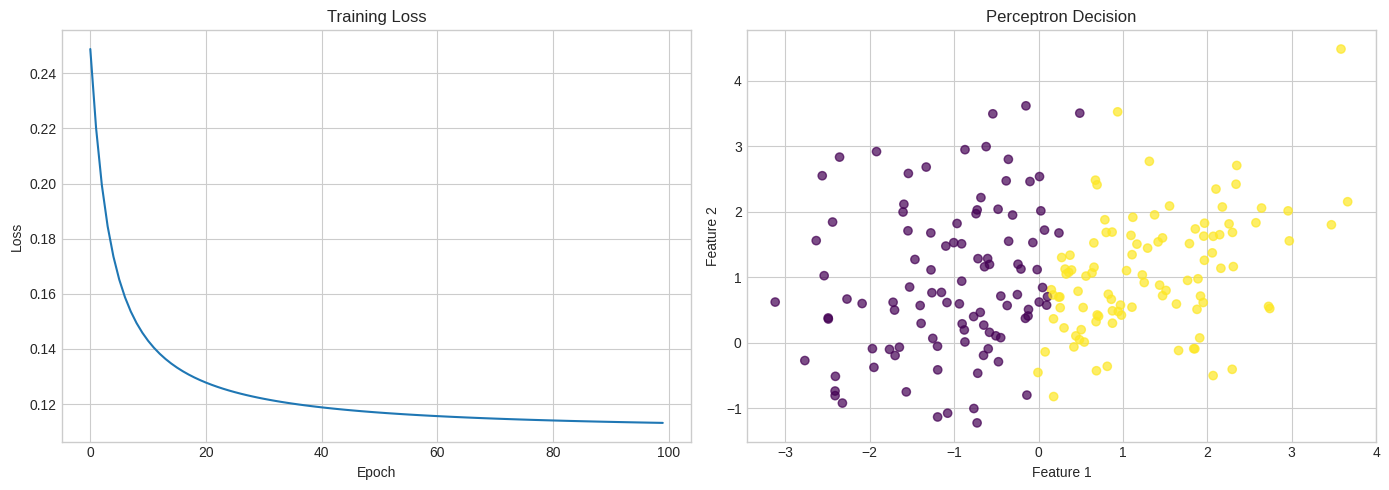

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')

axes[1].scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', alpha=0.7)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('Perceptron Decision')

plt.tight_layout()
plt.show()

---

## 3. Activation Functions

**Activation functions** introduce non-linearity, allowing networks to learn complex patterns.

| Function | Formula | Range | Use Case | Issues |
|----------|---------|-------|----------|--------|
| Sigmoid | $\frac{1}{1+e^{-x}}$ | (0, 1) | Binary output | Vanishing gradients |
| Tanh | $\frac{e^x - e^{-x}}{e^x + e^{-x}}$ | (-1, 1) | Hidden layers | Vanishing gradients |
| ReLU | $\max(0, x)$ | [0, inf) | Hidden layers | Dead neurons |
| Leaky ReLU | $\max(0.01x, x)$ | (-inf, inf) | Hidden layers | - |
| Softmax | $\frac{e^{x_i}}{\sum e^{x_j}}$ | (0, 1), sum=1 | Multi-class output | - |

In [5]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))


def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    """Derivative of sigmoid."""
    s = sigmoid(x)
    return s * (1 - s)


def tanh(x: np.ndarray) -> np.ndarray:
    """Hyperbolic tangent activation."""
    return np.tanh(x)


def tanh_derivative(x: np.ndarray) -> np.ndarray:
    """Derivative of tanh."""
    return 1 - np.tanh(x) ** 2


def relu(x: np.ndarray) -> np.ndarray:
    """Rectified Linear Unit."""
    return np.maximum(0, x)


def relu_derivative(x: np.ndarray) -> np.ndarray:
    """Derivative of ReLU."""
    x = np.asarray(x)
    return (x > 0).astype(float)


def leaky_relu(x: np.ndarray, alpha: float = 0.01) -> np.ndarray:
    """Leaky ReLU activation."""
    return np.where(x > 0, x, alpha * x)


def softmax(x: np.ndarray) -> np.ndarray:
    """Softmax activation for multi-class."""
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

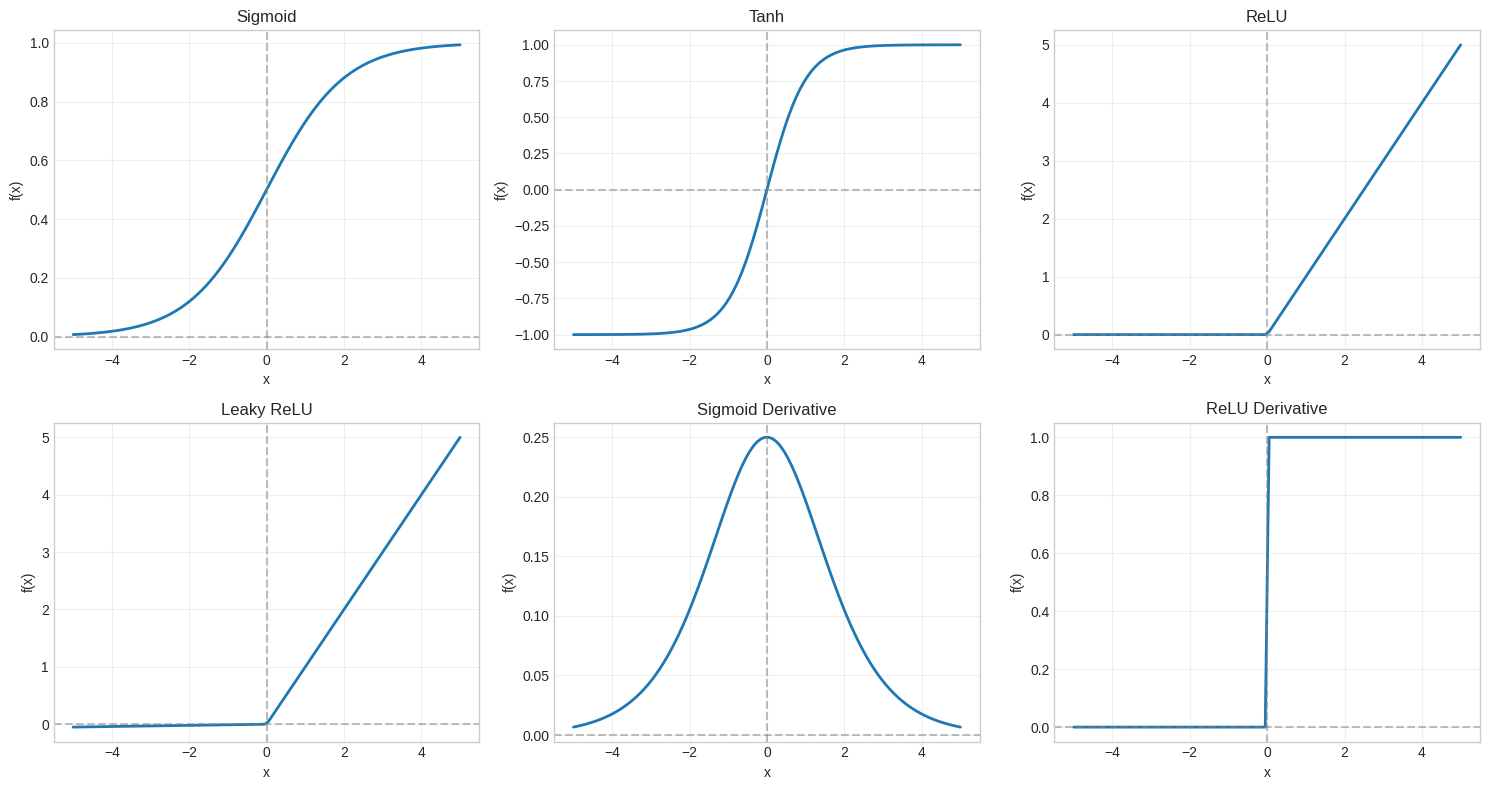

In [6]:
x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

activations = [
    ('Sigmoid', sigmoid(x)),
    ('Tanh', tanh(x)),
    ('ReLU', relu(x)),
    ('Leaky ReLU', leaky_relu(x)),
    ('Sigmoid Derivative', sigmoid_derivative(x)),
    ('ReLU Derivative', relu_derivative(x))
]

for ax, (name, values) in zip(axes.flat, activations):
    ax.plot(x, values, linewidth=2)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Vanishing Gradient Problem

**Problem**: Sigmoid/tanh gradients are small for large |x|, causing slow learning in deep networks.

**Solution**: Use ReLU or its variants for hidden layers.

In [7]:
print("Gradient magnitudes at different x values:")
print(f"{'x':>6} {'Sigmoid':>12} {'ReLU':>12}")
print("-" * 32)
for x_val in [-5, -2, 0, 2, 5]:
    sig_grad = sigmoid_derivative(x_val)
    relu_grad = relu_derivative(x_val)
    print(f"{x_val:>6} {sig_grad:>12.6f} {relu_grad:>12.1f}")

Gradient magnitudes at different x values:
     x      Sigmoid         ReLU
--------------------------------
    -5     0.006648          0.0
    -2     0.104994          0.0
     0     0.250000          0.0
     2     0.104994          1.0
     5     0.006648          1.0


---

## 4. Forward and Backward Propagation

### Forward Propagation
Pass input through network to get predictions:
$$\mathbf{a}^{[l]} = f(\mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]})$$

### Backward Propagation (Backprop)
Compute gradients using chain rule to update weights:
$$\frac{\partial L}{\partial \mathbf{W}^{[l]}} = \frac{\partial L}{\partial \mathbf{a}^{[l]}} \cdot \frac{\partial \mathbf{a}^{[l]}}{\partial \mathbf{z}^{[l]}} \cdot \frac{\partial \mathbf{z}^{[l]}}{\partial \mathbf{W}^{[l]}}$$

In [8]:
class SimpleNeuralNetwork:
    """Simple 2-layer neural network."""
    
    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        output_size: int,
        learning_rate: float = 0.01
    ):
        """Initialise neural network.
        
        Args:
            input_size: Number of input features.
            hidden_size: Number of hidden neurons.
            output_size: Number of output neurons.
            learning_rate: Learning rate.
        """
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate
        
        self.cache = {}
    
    def forward(self, X: np.ndarray) -> np.ndarray:
        """Forward propagation.
        
        Args:
            X: Input data.
        
        Returns:
            Network output.
        """
        self.cache['X'] = X
        
        self.cache['Z1'] = np.dot(X, self.W1) + self.b1
        self.cache['A1'] = relu(self.cache['Z1'])
        
        self.cache['Z2'] = np.dot(self.cache['A1'], self.W2) + self.b2
        self.cache['A2'] = sigmoid(self.cache['Z2'])
        
        return self.cache['A2']
    
    def backward(self, y: np.ndarray) -> Dict[str, np.ndarray]:
        """Backward propagation.
        
        Args:
            y: True labels.
        
        Returns:
            Dictionary of gradients.
        """
        m = y.shape[0]
        y = y.reshape(-1, 1)
        
        dZ2 = self.cache['A2'] - y
        dW2 = np.dot(self.cache['A1'].T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.cache['Z1'])
        dW1 = np.dot(self.cache['X'].T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    def update_weights(self, gradients: Dict[str, np.ndarray]) -> None:
        """Update weights using gradients."""
        self.W1 -= self.lr * gradients['dW1']
        self.b1 -= self.lr * gradients['db1']
        self.W2 -= self.lr * gradients['dW2']
        self.b2 -= self.lr * gradients['db2']
    
    def train(
        self,
        X: np.ndarray,
        y: np.ndarray,
        epochs: int = 1000
    ) -> List[float]:
        """Train the network.
        
        Args:
            X: Training features.
            y: Training labels.
            epochs: Number of epochs.
        
        Returns:
            List of losses per epoch.
        """
        losses = []
        
        for _ in range(epochs):
            output = self.forward(X)
            
            y_reshaped = y.reshape(-1, 1)
            loss = -np.mean(y_reshaped * np.log(output + 1e-8) + 
                           (1 - y_reshaped) * np.log(1 - output + 1e-8))
            losses.append(loss)
            
            gradients = self.backward(y)
            self.update_weights(gradients)
        
        return losses
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions."""
        return (self.forward(X) >= 0.5).astype(int).flatten()

In [9]:
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)

nn = SimpleNeuralNetwork(input_size=2, hidden_size=16, output_size=1, learning_rate=1.0)
losses = nn.train(X_moons, y_moons, epochs=1000)

predictions = nn.predict(X_moons)
accuracy = accuracy_score(y_moons, predictions)

print(f"Final accuracy: {accuracy:.2%}")

Final accuracy: 100.00%


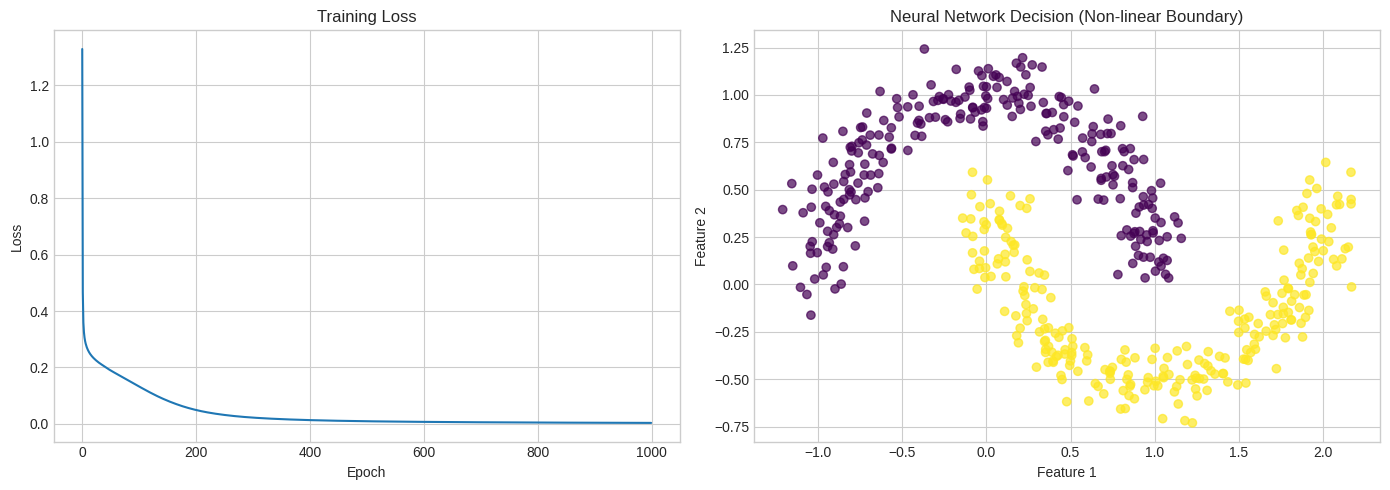

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=predictions, cmap='viridis', alpha=0.7)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('Neural Network Decision (Non-linear Boundary)')

plt.tight_layout()
plt.show()

---

## 5. Loss Functions

**Loss functions** measure how wrong predictions are.

| Loss | Formula | Use Case |
|------|---------|----------|
| MSE | $\frac{1}{n}\sum(y - \hat{y})^2$ | Regression |
| Binary Cross-Entropy | $-\frac{1}{n}\sum[y\log(\hat{y}) + (1-y)\log(1-\hat{y})]$ | Binary classification |
| Categorical Cross-Entropy | $-\sum y_i \log(\hat{y}_i)$ | Multi-class classification |

In [11]:
def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean Squared Error loss."""
    return np.mean((y_true - y_pred) ** 2)


def binary_cross_entropy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Binary Cross-Entropy loss."""
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def categorical_cross_entropy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Categorical Cross-Entropy loss."""
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

In [12]:
y_true = np.array([1, 0, 1, 1])
y_pred_good = np.array([0.9, 0.1, 0.8, 0.95])
y_pred_bad = np.array([0.2, 0.8, 0.3, 0.4])

print("Loss Comparison:")
print(f"{'Predictions':<15} {'BCE':>10} {'MSE':>10}")
print("-" * 37)
print(f"{'Good':.<15} {binary_cross_entropy(y_true, y_pred_good):>10.4f} {mse_loss(y_true, y_pred_good):>10.4f}")
print(f"{'Bad':.<15} {binary_cross_entropy(y_true, y_pred_bad):>10.4f} {mse_loss(y_true, y_pred_bad):>10.4f}")

Loss Comparison:
Predictions            BCE        MSE
-------------------------------------
Good...........     0.1213     0.0156
Bad............     1.3348     0.5325


---

## 6. Optimisers

**Optimisers** update weights to minimise the loss function.

| Optimiser | Update Rule | Key Feature |
|-----------|-------------|-------------|
| SGD | $w = w - \eta \nabla L$ | Simple, may oscillate |
| Momentum | $v = \beta v + \nabla L$; $w = w - \eta v$ | Smooths updates |
| RMSprop | Adapts learning rate per parameter | Good for RNNs |
| Adam | Combines Momentum + RMSprop | Default choice |

In [13]:
class SGD:
    """Stochastic Gradient Descent optimiser."""
    
    def __init__(self, learning_rate: float = 0.01):
        self.lr = learning_rate
    
    def update(self, param: np.ndarray, grad: np.ndarray) -> np.ndarray:
        return param - self.lr * grad


class SGDMomentum:
    """SGD with Momentum optimiser."""
    
    def __init__(self, learning_rate: float = 0.01, momentum: float = 0.9):
        self.lr = learning_rate
        self.momentum = momentum
        self.velocity = None
    
    def update(self, param: np.ndarray, grad: np.ndarray) -> np.ndarray:
        if self.velocity is None:
            self.velocity = np.zeros_like(param)
        
        self.velocity = self.momentum * self.velocity + grad
        return param - self.lr * self.velocity


class Adam:
    """Adam optimiser."""
    
    def __init__(
        self,
        learning_rate: float = 0.001,
        beta1: float = 0.9,
        beta2: float = 0.999,
        epsilon: float = 1e-8
    ):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, param: np.ndarray, grad: np.ndarray) -> np.ndarray:
        if self.m is None:
            self.m = np.zeros_like(param)
            self.v = np.zeros_like(param)
        
        self.t += 1
        
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        return param - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

---

## 7. Regularisation Techniques

**Regularisation** prevents overfitting.

| Technique | Description | Implementation |
|-----------|-------------|----------------|
| L1 (Lasso) | Adds $\lambda\sum|w|$ to loss | Sparse weights |
| L2 (Ridge) | Adds $\lambda\sum w^2$ to loss | Small weights |
| Dropout | Randomly set neurons to 0 during training | Ensemble effect |
| Batch Normalisation | Normalise layer inputs | Faster training |
| Early Stopping | Stop when validation loss increases | Simple, effective |

In [14]:
def dropout(x: np.ndarray, rate: float = 0.5, training: bool = True) -> np.ndarray:
    """Apply dropout regularisation.
    
    Args:
        x: Input tensor.
        rate: Dropout rate (fraction to drop).
        training: Whether in training mode.
    
    Returns:
        Tensor with dropout applied.
    """
    if not training:
        return x
    
    mask = np.random.binomial(1, 1 - rate, size=x.shape) / (1 - rate)
    return x * mask


def batch_normalisation(
    x: np.ndarray,
    gamma: float = 1.0,
    beta: float = 0.0,
    epsilon: float = 1e-8
) -> np.ndarray:
    """Apply batch normalisation.
    
    Args:
        x: Input tensor.
        gamma: Scale parameter.
        beta: Shift parameter.
        epsilon: Small constant for numerical stability.
    
    Returns:
        Normalised tensor.
    """
    mean = np.mean(x, axis=0)
    var = np.var(x, axis=0)
    x_norm = (x - mean) / np.sqrt(var + epsilon)
    return gamma * x_norm + beta

In [15]:
x = np.random.randn(5, 4)
print("Original:")
print(x.round(2))

print("\nWith Dropout (rate=0.5):")
print(dropout(x, rate=0.5).round(2))

print("\nBatch Normalised:")
print(batch_normalisation(x).round(2))

Original:
[[ 0.32 -0.39 -0.68  0.61]
 [ 1.03  0.93 -0.84 -0.31]
 [ 0.33  0.98 -0.48 -0.19]
 [-1.11 -1.2   0.81  1.36]
 [-0.07  1.    0.36 -0.65]]

With Dropout (rate=0.5):
[[ 0.65 -0.77 -1.35  0.  ]
 [ 2.06  0.   -0.   -0.  ]
 [ 0.    1.95 -0.   -0.37]
 [-2.21 -0.    0.    2.71]
 [-0.    0.    0.   -0.  ]]

Batch Normalised:
[[ 0.32 -0.72 -0.8   0.62]
 [ 1.33  0.74 -1.05 -0.66]
 [ 0.33  0.79 -0.49 -0.48]
 [-1.72 -1.62  1.53  1.64]
 [-0.25  0.82  0.82 -1.12]]


---

## 8. Convolutional Neural Networks (CNNs)

**CNNs** are specialised for grid-like data (images).

### Key Components:

| Layer | Purpose | Parameters |
|-------|---------|------------|
| Convolution | Extract local features | Filters, kernel size, stride, padding |
| Pooling | Reduce spatial dimensions | Pool size, stride |
| Flatten | Convert to 1D | None |
| Dense | Final classification | Neurons |

### Convolution Operation
Slides a kernel (filter) over the input, computing dot products.

**Output size**: $\frac{n + 2p - f}{s} + 1$
- $n$: input size
- $p$: padding
- $f$: filter size
- $s$: stride

In [16]:
def conv2d(
    image: np.ndarray,
    kernel: np.ndarray,
    stride: int = 1,
    padding: int = 0
) -> np.ndarray:
    """2D convolution operation.
    
    Args:
        image: Input image (H x W).
        kernel: Convolution kernel (kH x kW).
        stride: Step size.
        padding: Zero padding.
    
    Returns:
        Convolved output.
    """
    if padding > 0:
        image = np.pad(image, padding, mode='constant', constant_values=0)
    
    h, w = image.shape
    kh, kw = kernel.shape
    
    out_h = (h - kh) // stride + 1
    out_w = (w - kw) // stride + 1
    
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            region = image[i*stride:i*stride+kh, j*stride:j*stride+kw]
            output[i, j] = np.sum(region * kernel)
    
    return output


def max_pool2d(
    image: np.ndarray,
    pool_size: int = 2,
    stride: int = 2
) -> np.ndarray:
    """2D max pooling operation.
    
    Args:
        image: Input image.
        pool_size: Size of pooling window.
        stride: Step size.
    
    Returns:
        Pooled output.
    """
    h, w = image.shape
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1
    
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            region = image[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
            output[i, j] = np.max(region)
    
    return output

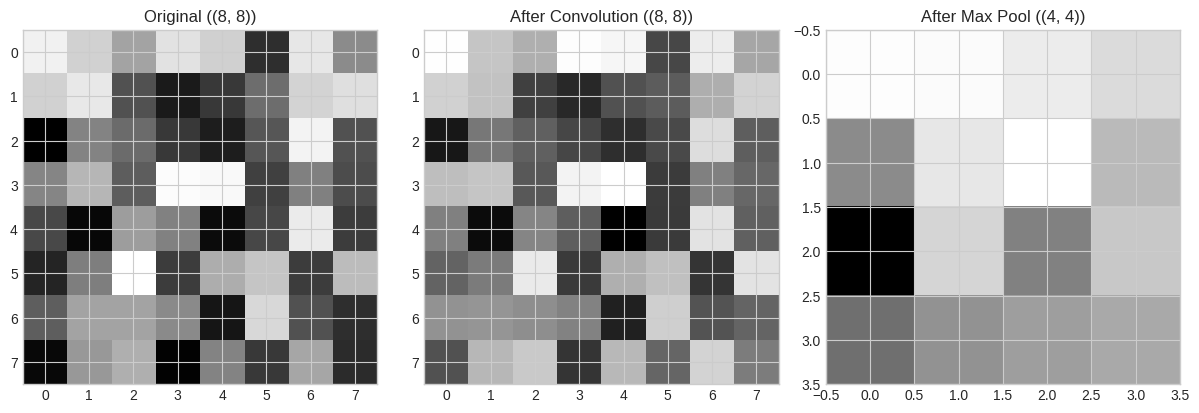

In [17]:
image = np.random.rand(8, 8)

edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

convolved = conv2d(image, edge_kernel, stride=1, padding=1)
pooled = max_pool2d(convolved, pool_size=2, stride=2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image, cmap='gray')
axes[0].set_title(f'Original ({image.shape})')

axes[1].imshow(convolved, cmap='gray')
axes[1].set_title(f'After Convolution ({convolved.shape})')

axes[2].imshow(pooled, cmap='gray')
axes[2].set_title(f'After Max Pool ({pooled.shape})')

plt.tight_layout()
plt.show()

### Common CNN Architectures

| Architecture | Year | Key Innovation |
|--------------|------|----------------|
| LeNet | 1998 | First successful CNN |
| AlexNet | 2012 | ReLU, Dropout, GPU training |
| VGG | 2014 | Small filters (3x3), deeper |
| ResNet | 2015 | Skip connections (residual) |
| EfficientNet | 2019 | Compound scaling |

---

## 9. Recurrent Neural Networks (RNNs)

**RNNs** are designed for sequential data (text, time series).

### Basic RNN
$$h_t = \tanh(W_{hh}h_{t-1} + W_{xh}x_t + b_h)$$
$$y_t = W_{hy}h_t + b_y$$

**Problem**: Vanishing/exploding gradients for long sequences.

### LSTM (Long Short-Term Memory)
Uses **gates** to control information flow:
- **Forget gate**: What to discard from cell state
- **Input gate**: What new information to store
- **Output gate**: What to output

### GRU (Gated Recurrent Unit)
Simplified LSTM with:
- **Reset gate**: Controls how much past to forget
- **Update gate**: Controls how much to update

In [18]:
class SimpleRNN:
    """Simple RNN cell implementation."""
    
    def __init__(self, input_size: int, hidden_size: int):
        """Initialise RNN cell.
        
        Args:
            input_size: Input dimension.
            hidden_size: Hidden state dimension.
        """
        self.hidden_size = hidden_size
        
        self.Wxh = np.random.randn(input_size, hidden_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.bh = np.zeros((1, hidden_size))
    
    def forward(
        self,
        x: np.ndarray,
        h_prev: np.ndarray = None
    ) -> Tuple[np.ndarray, List[np.ndarray]]:
        """Forward pass through sequence.
        
        Args:
            x: Input sequence (seq_len, input_size).
            h_prev: Initial hidden state.
        
        Returns:
            Tuple of (final hidden state, all hidden states).
        """
        seq_len = x.shape[0]
        
        if h_prev is None:
            h_prev = np.zeros((1, self.hidden_size))
        
        hidden_states = []
        h = h_prev
        
        for t in range(seq_len):
            x_t = x[t:t+1]
            h = np.tanh(np.dot(x_t, self.Wxh) + np.dot(h, self.Whh) + self.bh)
            hidden_states.append(h)
        
        return h, hidden_states

In [19]:
rnn = SimpleRNN(input_size=10, hidden_size=20)
sequence = np.random.randn(5, 10)

final_h, all_h = rnn.forward(sequence)

print(f"Input sequence shape: {sequence.shape}")
print(f"Final hidden state shape: {final_h.shape}")
print(f"Number of hidden states: {len(all_h)}")

Input sequence shape: (5, 10)
Final hidden state shape: (1, 20)
Number of hidden states: 5


In [20]:
class LSTMCell:
    """LSTM cell implementation."""
    
    def __init__(self, input_size: int, hidden_size: int):
        """Initialise LSTM cell.
        
        Args:
            input_size: Input dimension.
            hidden_size: Hidden state dimension.
        """
        self.hidden_size = hidden_size
        scale = np.sqrt(2.0 / (input_size + hidden_size))
        
        # Forget gate
        self.Wf = np.random.randn(input_size + hidden_size, hidden_size) * scale
        self.bf = np.zeros((1, hidden_size))
        
        # Input gate
        self.Wi = np.random.randn(input_size + hidden_size, hidden_size) * scale
        self.bi = np.zeros((1, hidden_size))
        
        # Cell state
        self.Wc = np.random.randn(input_size + hidden_size, hidden_size) * scale
        self.bc = np.zeros((1, hidden_size))
        
        # Output gate
        self.Wo = np.random.randn(input_size + hidden_size, hidden_size) * scale
        self.bo = np.zeros((1, hidden_size))
    
    def forward(
        self,
        x_t: np.ndarray,
        h_prev: np.ndarray,
        c_prev: np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray]:
        """Forward pass for single timestep.
        
        Args:
            x_t: Input at time t.
            h_prev: Previous hidden state.
            c_prev: Previous cell state.
        
        Returns:
            Tuple of (new hidden state, new cell state).
        """
        combined = np.concatenate([x_t, h_prev], axis=1)
        
        f_t = sigmoid(np.dot(combined, self.Wf) + self.bf)
        i_t = sigmoid(np.dot(combined, self.Wi) + self.bi)
        c_tilde = np.tanh(np.dot(combined, self.Wc) + self.bc)
        o_t = sigmoid(np.dot(combined, self.Wo) + self.bo)
        
        c_t = f_t * c_prev + i_t * c_tilde
        h_t = o_t * np.tanh(c_t)
        
        return h_t, c_t

In [21]:
lstm = LSTMCell(input_size=10, hidden_size=20)

x_t = np.random.randn(1, 10)
h_prev = np.zeros((1, 20))
c_prev = np.zeros((1, 20))

h_t, c_t = lstm.forward(x_t, h_prev, c_prev)

print(f"Input shape: {x_t.shape}")
print(f"Hidden state shape: {h_t.shape}")
print(f"Cell state shape: {c_t.shape}")

Input shape: (1, 10)
Hidden state shape: (1, 20)
Cell state shape: (1, 20)


---

## 10. Transfer Learning

**Transfer learning** uses a model trained on one task as starting point for another task.

### Approaches:

| Strategy | When to Use | Implementation |
|----------|-------------|----------------|
| Feature Extraction | Small dataset, similar domain | Freeze all layers, train only classifier |
| Fine-tuning | Medium dataset | Unfreeze some layers, train with low LR |
| Full fine-tuning | Large dataset | Unfreeze all, use pretrained weights as init |

### Common Pretrained Models:
- **Images**: ResNet, VGG, EfficientNet (trained on ImageNet)
- **Text**: BERT, GPT (trained on large text corpora)
- **Audio**: Wav2Vec (trained on speech data)

In [22]:
print("Transfer Learning Decision Guide:\n")
print("Dataset Size vs Domain Similarity Matrix:")
print()
print(f"{'':20} | {'Similar Domain':20} | {'Different Domain':20}")
print("-" * 65)
print(f"{'Small Dataset':20} | {'Feature Extraction':20} | {'Feature Extraction*':20}")
print(f"{'Medium Dataset':20} | {'Fine-tune top layers':20} | {'Fine-tune more layers':20}")
print(f"{'Large Dataset':20} | {'Full fine-tuning':20} | {'Train from scratch':20}")
print()
print("* May not work well if domains are very different")

Transfer Learning Decision Guide:

Dataset Size vs Domain Similarity Matrix:

                     | Similar Domain       | Different Domain    
-----------------------------------------------------------------
Small Dataset        | Feature Extraction   | Feature Extraction* 
Medium Dataset       | Fine-tune top layers | Fine-tune more layers
Large Dataset        | Full fine-tuning     | Train from scratch  

* May not work well if domains are very different


---

## 11. Practical Considerations

### Hyperparameters to Tune

| Hyperparameter | Typical Range | Effect |
|----------------|---------------|--------|
| Learning rate | 1e-5 to 1e-1 | Too high: diverge, too low: slow |
| Batch size | 16 to 512 | Larger: faster, may generalise worse |
| Hidden layers | 1 to 10+ | More: more capacity, overfitting risk |
| Neurons per layer | 32 to 1024 | More: more capacity |
| Dropout rate | 0.1 to 0.5 | Higher: more regularisation |

### Training Tips
1. Start with proven architectures
2. Use batch normalisation
3. Start with Adam optimiser
4. Use learning rate scheduling
5. Monitor for overfitting with validation set
6. Use early stopping
7. Data augmentation for images

In [23]:
def learning_rate_schedule(
    initial_lr: float,
    epoch: int,
    schedule_type: str = 'step'
) -> float:
    """Compute learning rate based on schedule.
    
    Args:
        initial_lr: Initial learning rate.
        epoch: Current epoch.
        schedule_type: Type of schedule ('step', 'exponential', 'cosine').
    
    Returns:
        Adjusted learning rate.
    """
    if schedule_type == 'step':
        return initial_lr * (0.1 ** (epoch // 30))
    
    elif schedule_type == 'exponential':
        return initial_lr * (0.95 ** epoch)
    
    elif schedule_type == 'cosine':
        return initial_lr * (1 + np.cos(np.pi * epoch / 100)) / 2
    
    return initial_lr

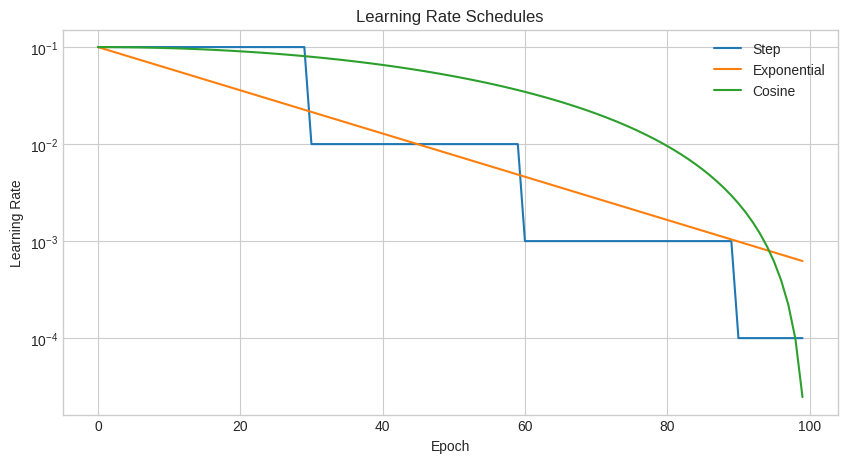

In [24]:
epochs = np.arange(100)
initial_lr = 0.1

plt.figure(figsize=(10, 5))
for schedule in ['step', 'exponential', 'cosine']:
    lrs = [learning_rate_schedule(initial_lr, e, schedule) for e in epochs]
    plt.plot(epochs, lrs, label=schedule.capitalize())

plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedules')
plt.legend()
plt.yscale('log')
plt.show()

## 12. Practice Questions

Test your understanding with these interview-style questions. Try to solve each question in the empty code cell before revealing the answer.

### Question 1: Implement ReLU and Its Derivative

Implement ReLU activation and its derivative from scratch.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def relu(x: np.ndarray) -> np.ndarray:
    """ReLU activation function.
    
    Args:
        x: Input array.
    
    Returns:
        ReLU applied element-wise.
    """
    return np.maximum(0, x)


def relu_derivative(x: np.ndarray) -> np.ndarray:
    """Derivative of ReLU.
    
    Args:
        x: Input array.
    
    Returns:
        Derivative (1 where x > 0, else 0).
    """
    return (x > 0).astype(float)


# Test
x = np.array([-2, -1, 0, 1, 2])
print(f"Input: {x}")
print(f"ReLU: {relu(x)}")
print(f"Derivative: {relu_derivative(x)}")
```

</details>


---

### Question 2: Softmax Implementation

Implement numerically stable softmax.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def softmax(x: np.ndarray) -> np.ndarray:
    """Numerically stable softmax.
    
    Args:
        x: Input array.
    
    Returns:
        Softmax probabilities.
    """
    # Subtract max for numerical stability
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)


# Test
x = np.array([1.0, 2.0, 3.0])
probs = softmax(x)
print(f"Input: {x}")
print(f"Softmax: {probs}")
print(f"Sum: {np.sum(probs):.4f}")
```

</details>


---

### Question 3: Cross-Entropy Loss

Implement binary cross-entropy loss.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def binary_cross_entropy(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    epsilon: float = 1e-15
) -> float:
    """Binary cross-entropy loss.
    
    Args:
        y_true: True labels (0 or 1).
        y_pred: Predicted probabilities.
        epsilon: Small value to prevent log(0).
    
    Returns:
        Mean binary cross-entropy.
    """
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )


# Test
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.1, 0.8, 0.7])
loss = binary_cross_entropy(y_true, y_pred)
print(f"BCE Loss: {loss:.4f}")
```

</details>


---

### Question 4: Xavier Weight Initialisation

Implement Xavier (Glorot) weight initialisation.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def xavier_init(
    fan_in: int,
    fan_out: int,
    uniform: bool = True
) -> np.ndarray:
    """Xavier (Glorot) weight initialisation.
    
    Args:
        fan_in: Number of input units.
        fan_out: Number of output units.
        uniform: Use uniform (True) or normal (False).
    
    Returns:
        Initialised weight matrix.
    """
    if uniform:
        limit = np.sqrt(6 / (fan_in + fan_out))
        return np.random.uniform(-limit, limit, (fan_in, fan_out))
    else:
        std = np.sqrt(2 / (fan_in + fan_out))
        return np.random.randn(fan_in, fan_out) * std


# Test
weights = xavier_init(100, 50)
print(f"Shape: {weights.shape}")
print(f"Mean: {weights.mean():.4f}")
print(f"Std: {weights.std():.4f}")
```

</details>


---

### Question 5: Dropout Implementation

Implement dropout with inverted scaling.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def dropout(
    x: np.ndarray,
    rate: float = 0.5,
    training: bool = True
) -> np.ndarray:
    """Apply inverted dropout.
    
    Args:
        x: Input tensor.
        rate: Fraction of units to drop.
        training: Whether in training mode.
    
    Returns:
        Tensor with dropout applied.
    """
    if not training or rate == 0:
        return x
    
    # Create mask and scale by keep probability
    keep_prob = 1 - rate
    mask = np.random.binomial(1, keep_prob, size=x.shape) / keep_prob
    
    return x * mask


# Test
np.random.seed(42)
x = np.ones((3, 4))
print(f"Original:\n{x}")
print(f"\nWith dropout (rate=0.5):\n{dropout(x, rate=0.5)}")
print(f"\nInference (no dropout):\n{dropout(x, rate=0.5, training=False)}")
```

</details>


---

### Question 6: Batch Normalisation

Implement batch normalisation for training.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def batch_norm(
    x: np.ndarray,
    gamma: np.ndarray = None,
    beta: np.ndarray = None,
    epsilon: float = 1e-5
) -> tuple:
    """Batch normalisation.
    
    Args:
        x: Input (batch_size, features).
        gamma: Scale parameter.
        beta: Shift parameter.
        epsilon: Numerical stability.
    
    Returns:
        Tuple of (normalised output, mean, variance).
    """
    mean = np.mean(x, axis=0, keepdims=True)
    var = np.var(x, axis=0, keepdims=True)
    
    x_norm = (x - mean) / np.sqrt(var + epsilon)
    
    if gamma is None:
        gamma = np.ones_like(mean)
    if beta is None:
        beta = np.zeros_like(mean)
    
    out = gamma * x_norm + beta
    
    return out, mean, var


# Test
x = np.random.randn(32, 10) * 5 + 3  # Mean ~3, std ~5
x_norm, mean, var = batch_norm(x)
print(f"Original - Mean: {x.mean():.2f}, Std: {x.std():.2f}")
print(f"Normalised - Mean: {x_norm.mean():.2f}, Std: {x_norm.std():.2f}")
```

</details>


---

### Question 7: Convolution Output Size

Calculate the output size of a convolutional layer.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
def conv_output_size(
    input_size: int,
    kernel_size: int,
    stride: int = 1,
    padding: int = 0
) -> int:
    """Calculate convolution output size.
    
    Args:
        input_size: Input dimension.
        kernel_size: Filter size.
        stride: Step size.
        padding: Zero padding.
    
    Returns:
        Output dimension.
    """
    return (input_size + 2 * padding - kernel_size) // stride + 1


# Test
print("Conv output sizes:")
print(f"  32x32 input, 3x3 kernel, stride 1, no padding: {conv_output_size(32, 3)}")
print(f"  32x32 input, 3x3 kernel, stride 1, padding 1: {conv_output_size(32, 3, padding=1)}")
print(f"  32x32 input, 5x5 kernel, stride 2, padding 2: {conv_output_size(32, 5, stride=2, padding=2)}")
```

</details>


---

### Question 8: Gradient Descent Step

Implement a single gradient descent update step.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np
from typing import Dict

def gradient_descent_step(
    parameters: Dict[str, np.ndarray],
    gradients: Dict[str, np.ndarray],
    learning_rate: float
) -> Dict[str, np.ndarray]:
    """Perform one gradient descent step.
    
    Args:
        parameters: Dictionary of parameters.
        gradients: Dictionary of gradients.
        learning_rate: Step size.
    
    Returns:
        Updated parameters.
    """
    updated = {}
    for key in parameters:
        updated[key] = parameters[key] - learning_rate * gradients['d' + key]
    return updated


# Test
params = {'W': np.array([1.0, 2.0]), 'b': np.array([0.5])}
grads = {'dW': np.array([0.1, 0.2]), 'db': np.array([0.05])}

new_params = gradient_descent_step(params, grads, learning_rate=0.1)
print(f"Old W: {params['W']}")
print(f"New W: {new_params['W']}")
```

</details>


---

### Question 9: LSTM Gates

Explain and implement the forget gate of an LSTM.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
import numpy as np

def forget_gate(
    x_t: np.ndarray,
    h_prev: np.ndarray,
    Wf: np.ndarray,
    bf: np.ndarray
) -> np.ndarray:
    """LSTM forget gate computation.
    
    The forget gate decides what information to discard from the cell state.
    Output is between 0 (forget everything) and 1 (keep everything).
    
    Args:
        x_t: Current input.
        h_prev: Previous hidden state.
        Wf: Forget gate weights.
        bf: Forget gate bias.
    
    Returns:
        Forget gate activation.
    """
    combined = np.concatenate([h_prev, x_t], axis=1)
    return 1 / (1 + np.exp(-(np.dot(combined, Wf) + bf)))


# Test
x_t = np.random.randn(1, 10)
h_prev = np.random.randn(1, 20)
Wf = np.random.randn(30, 20) * 0.01
bf = np.zeros((1, 20))

f = forget_gate(x_t, h_prev, Wf, bf)
print(f"Forget gate shape: {f.shape}")
print(f"Values range: [{f.min():.4f}, {f.max():.4f}]")
```

</details>


---

### Question 10: Model Parameters Count

Calculate total parameters in a neural network.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from typing import List, Tuple

def count_parameters(layers: List[Tuple[int, int]]) -> int:
    """Count total parameters in a fully-connected network.
    
    Args:
        layers: List of (input_size, output_size) for each layer.
    
    Returns:
        Total number of trainable parameters.
    """
    total = 0
    for input_size, output_size in layers:
        weights = input_size * output_size
        biases = output_size
        total += weights + biases
    return total


# Test: Network with input=784, hidden=256, hidden=128, output=10
layers = [(784, 256), (256, 128), (128, 10)]
total_params = count_parameters(layers)

print("Network architecture:")
for i, (inp, out) in enumerate(layers):
    params = inp * out + out
    print(f"  Layer {i+1}: {inp} -> {out}, params: {params:,}")
print(f"\nTotal parameters: {total_params:,}")
```

</details>


---

### Question 11: Early Stopping

Implement early stopping logic.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
class EarlyStopping:
    """Early stopping to prevent overfitting."""
    
    def __init__(self, patience: int = 5, min_delta: float = 0.0):
        """Initialise early stopping.
        
        Args:
            patience: Epochs to wait for improvement.
            min_delta: Minimum change to qualify as improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0
        self.should_stop = False
    
    def __call__(self, val_loss: float) -> bool:
        """Check if training should stop.
        
        Args:
            val_loss: Current validation loss.
        
        Returns:
            True if should stop, False otherwise.
        """
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.should_stop = True
        
        return self.should_stop


# Test
early_stop = EarlyStopping(patience=3)
val_losses = [0.5, 0.4, 0.35, 0.36, 0.37, 0.38, 0.39]

for epoch, loss in enumerate(val_losses):
    stop = early_stop(loss)
    print(f"Epoch {epoch}: loss={loss}, counter={early_stop.counter}, stop={stop}")
    if stop:
        print("Early stopping triggered!")
        break
```

</details>


---

### Question 12: CNN Architecture Design

Design a CNN architecture for MNIST classification.

In [ ]:
# Write your solution here

<details>
<summary>Click to reveal answer</summary>

```python
def design_mnist_cnn() -> dict:
    """Design a CNN for MNIST (28x28 grayscale images, 10 classes).
    
    Returns:
        Dictionary describing the architecture.
    """
    architecture = {
        'input': '28x28x1',
        'layers': [
            {'type': 'Conv2D', 'filters': 32, 'kernel': 3, 'activation': 'relu',
             'output': '26x26x32'},
            {'type': 'MaxPool2D', 'pool_size': 2, 'output': '13x13x32'},
            {'type': 'Conv2D', 'filters': 64, 'kernel': 3, 'activation': 'relu',
             'output': '11x11x64'},
            {'type': 'MaxPool2D', 'pool_size': 2, 'output': '5x5x64'},
            {'type': 'Flatten', 'output': '1600'},
            {'type': 'Dense', 'units': 128, 'activation': 'relu'},
            {'type': 'Dropout', 'rate': 0.5},
            {'type': 'Dense', 'units': 10, 'activation': 'softmax'}
        ],
        'total_params': {
            'conv1': 32 * (3 * 3 * 1 + 1),  # 320
            'conv2': 64 * (3 * 3 * 32 + 1),  # 18,496
            'dense1': 1600 * 128 + 128,  # 204,928
            'dense2': 128 * 10 + 10  # 1,290
        }
    }
    
    total = sum(architecture['total_params'].values())
    architecture['total_params']['total'] = total
    
    return architecture


# Test
arch = design_mnist_cnn()
print("MNIST CNN Architecture:\n")
print(f"Input: {arch['input']}")
for layer in arch['layers']:
    print(f"  {layer}")
print(f"\nTotal parameters: {arch['total_params']['total']:,}")
```

</details>


---

## 13. Summary

This notebook covered deep learning fundamentals:

1. **Neural Network Basics**: Perceptrons, layers, forward propagation
2. **Activation Functions**: Sigmoid, tanh, ReLU, softmax and their properties
3. **Backpropagation**: Computing gradients using chain rule
4. **Loss Functions**: MSE, binary/categorical cross-entropy
5. **Optimisers**: SGD, Momentum, Adam
6. **Regularisation**: L1/L2, dropout, batch normalisation, early stopping
7. **CNNs**: Convolution, pooling, common architectures
8. **RNNs**: Basic RNN, LSTM, GRU for sequential data
9. **Transfer Learning**: Feature extraction vs fine-tuning
10. **Practical Tips**: Hyperparameter tuning, learning rate schedules

---

### Key Interview Tips

- **Know the intuition**: Be able to explain why ReLU helps with vanishing gradients
- **Understand trade-offs**: Why use LSTM over simple RNN? When to use CNN vs RNN?
- **Common architectures**: Know ResNet (skip connections), LSTM gates
- **Practical knowledge**: How to deal with overfitting, when to use transfer learning
- **Math foundations**: Be able to derive simple gradients, explain backprop
- **Implementation details**: Xavier initialisation, batch normalisation, dropout